In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc

In [3]:
plt.rc('font',size=25)
pd.set_option('max_column',200)

In [2]:
g=pd.read_csv('../Downloads/catalog/star_matched_gaia_after_calibration_dist_sm2.csv')

# gaia distance sigma

In [11]:
gb=g[(g.gr<0.6)]
gr=g[(g.gr>0.6)]

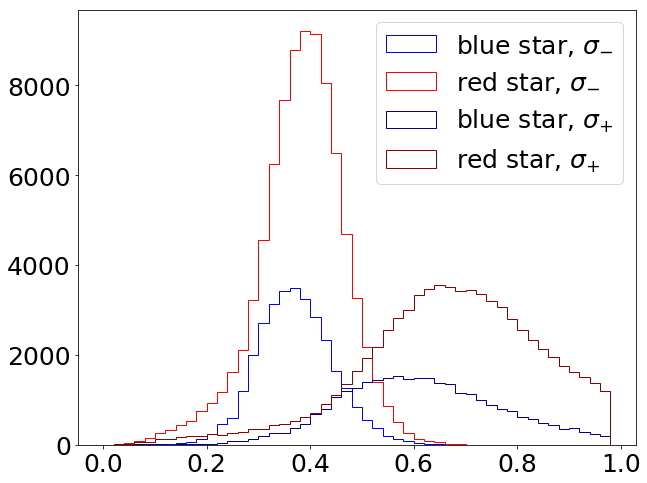

In [18]:
plt.figure(figsize=(10,8))
bins=np.arange(0,1,0.02)
plt.hist((gb.r_est-gb.r_lo)/gb.r_est,bins=bins,histtype='step',label='blue star, $\sigma_{-}$',color='blue')
plt.hist((gr.r_est-gr.r_lo)/gr.r_est,bins=bins,histtype='step',label='red star, $\sigma_{-}$',color='red')
plt.hist((gb.r_hi-gb.r_est)/gb.r_est,bins=bins,histtype='step',label='blue star, $\sigma_{+}$',color='darkblue')
plt.hist((gr.r_hi-gr.r_est)/gr.r_est,bins=bins,histtype='step',label='red star, $\sigma_{+}$',color='darkred')
plt.legend()
plt.savefig('../Downloads/gaia/dist_est_sigma.png')

# gaia matched with zeljko

In [19]:
zg=pd.read_csv('../Downloads/catalog/gaia_zeljko')

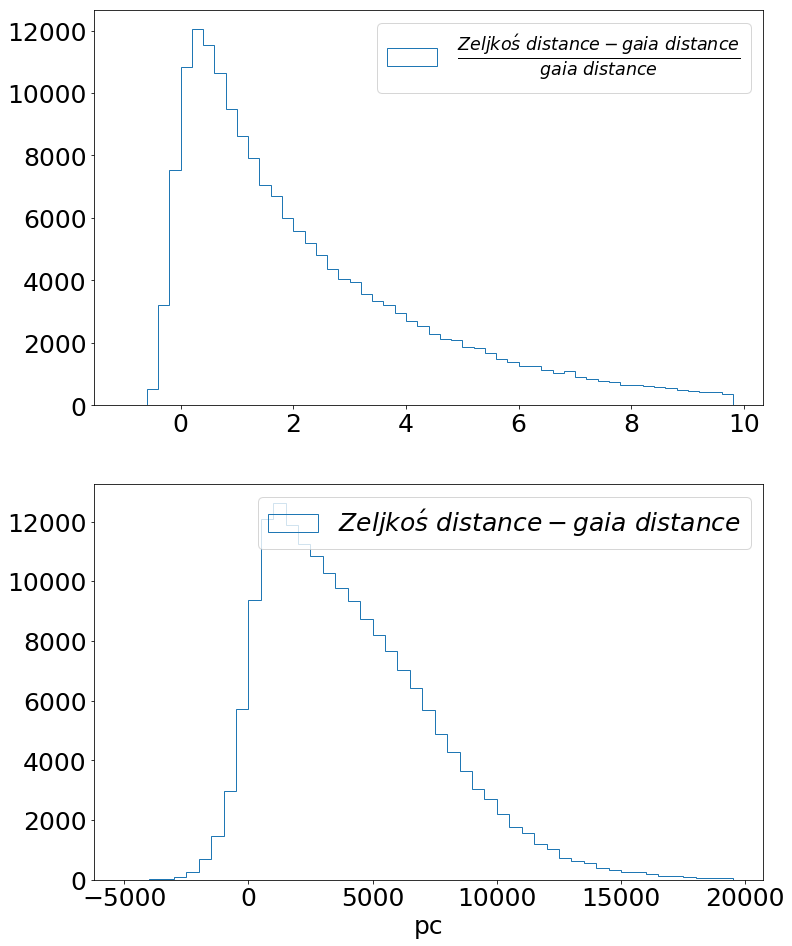

In [58]:
plt.figure(figsize=(12,16))
plt.subplot(211)
plt.hist((zg.D-zg.r_est)/zg.r_est,histtype='step',bins=np.arange(-1,10,0.2),label=r'$\frac{Zeljko\'s\ distance-gaia\ distance}{gaia\ distance}$')
plt.legend()
plt.subplot(212)
plt.hist((zg.D-zg.r_est),histtype='step',bins=np.arange(-5000,20000,500),label=r'$Zeljko\'s\ distance-gaia\ distance$')
plt.xlabel('pc')
plt.legend()
plt.savefig('../Downloads/gaia/dist_est_gaia_zeljko.png')

# Old one

In [8]:
mm=[[]*i for i in range(6)]
for i in range(6):
    mm[i]=g[(g.r_est>=500*i)&(g.r_est<500*(i+1))]

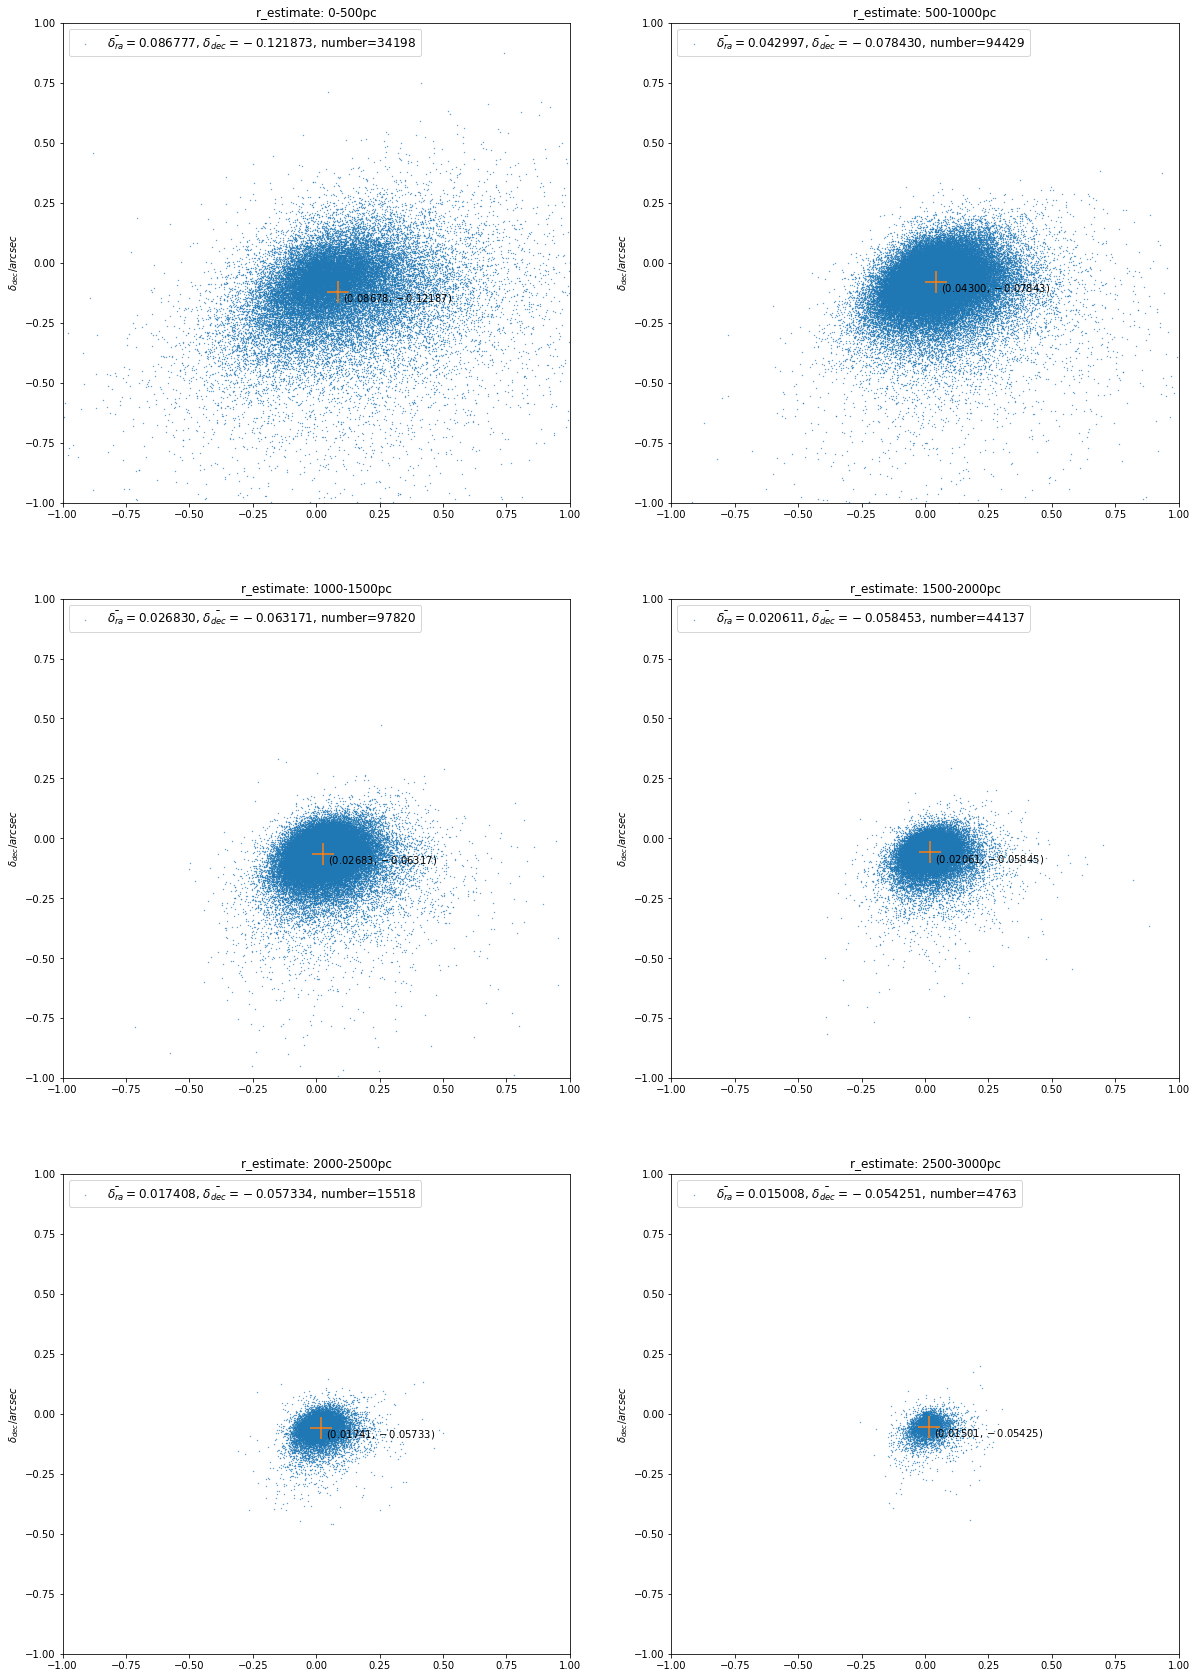

In [106]:
plt.figure(figsize=(20,30))
for i in range(6):
    mram=np.mean(mm[i].pmra)/100
    mdecm=np.mean(mm[i].pmdec)/100
    plt.subplot(321+i)
    plt.title(r'r_estimate: '+str(i*500)+'-'+str((i+1)*500)+'pc')
    plt.scatter(mm[i].pmra/100,mm[i].pmdec/100,alpha=1,s=0.1,label=r'$\bar{\delta_{ra}}=%f$, $\bar{\delta_{dec}}=%f$, number=%.0f'%(mram,mdecm,len(mm[i])))
    plt.scatter(mram,mdecm,s=500,marker='+')
    plt.text(mram+0.02,mdecm-0.04,'$(%0.5f,%0.5f)$'%(mram,mdecm))
    plt.ylabel(r'$\delta_{dec}/arcsec$')
    plt.legend(loc=2,fontsize=12)
    plt.axis([-1,1,-1,1])
plt.savefig('delta_dist_r_est.png')

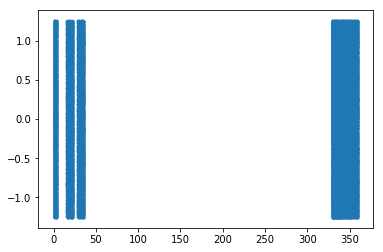

In [83]:
plt.scatter(g.ra,g.dec,s=0.1)

In [84]:
ga=pd.read_csv('gaia_dist-result.csv')

In [87]:
mga=[[]*i for i in range(6)]
for i in range(5):
    mga[i]=ga[(ga.r_est>=1000*i)&(ga.r_est<1000*(i+1))]

In [88]:
mga[5]=ga[(ga.r_est>=1000*5)]

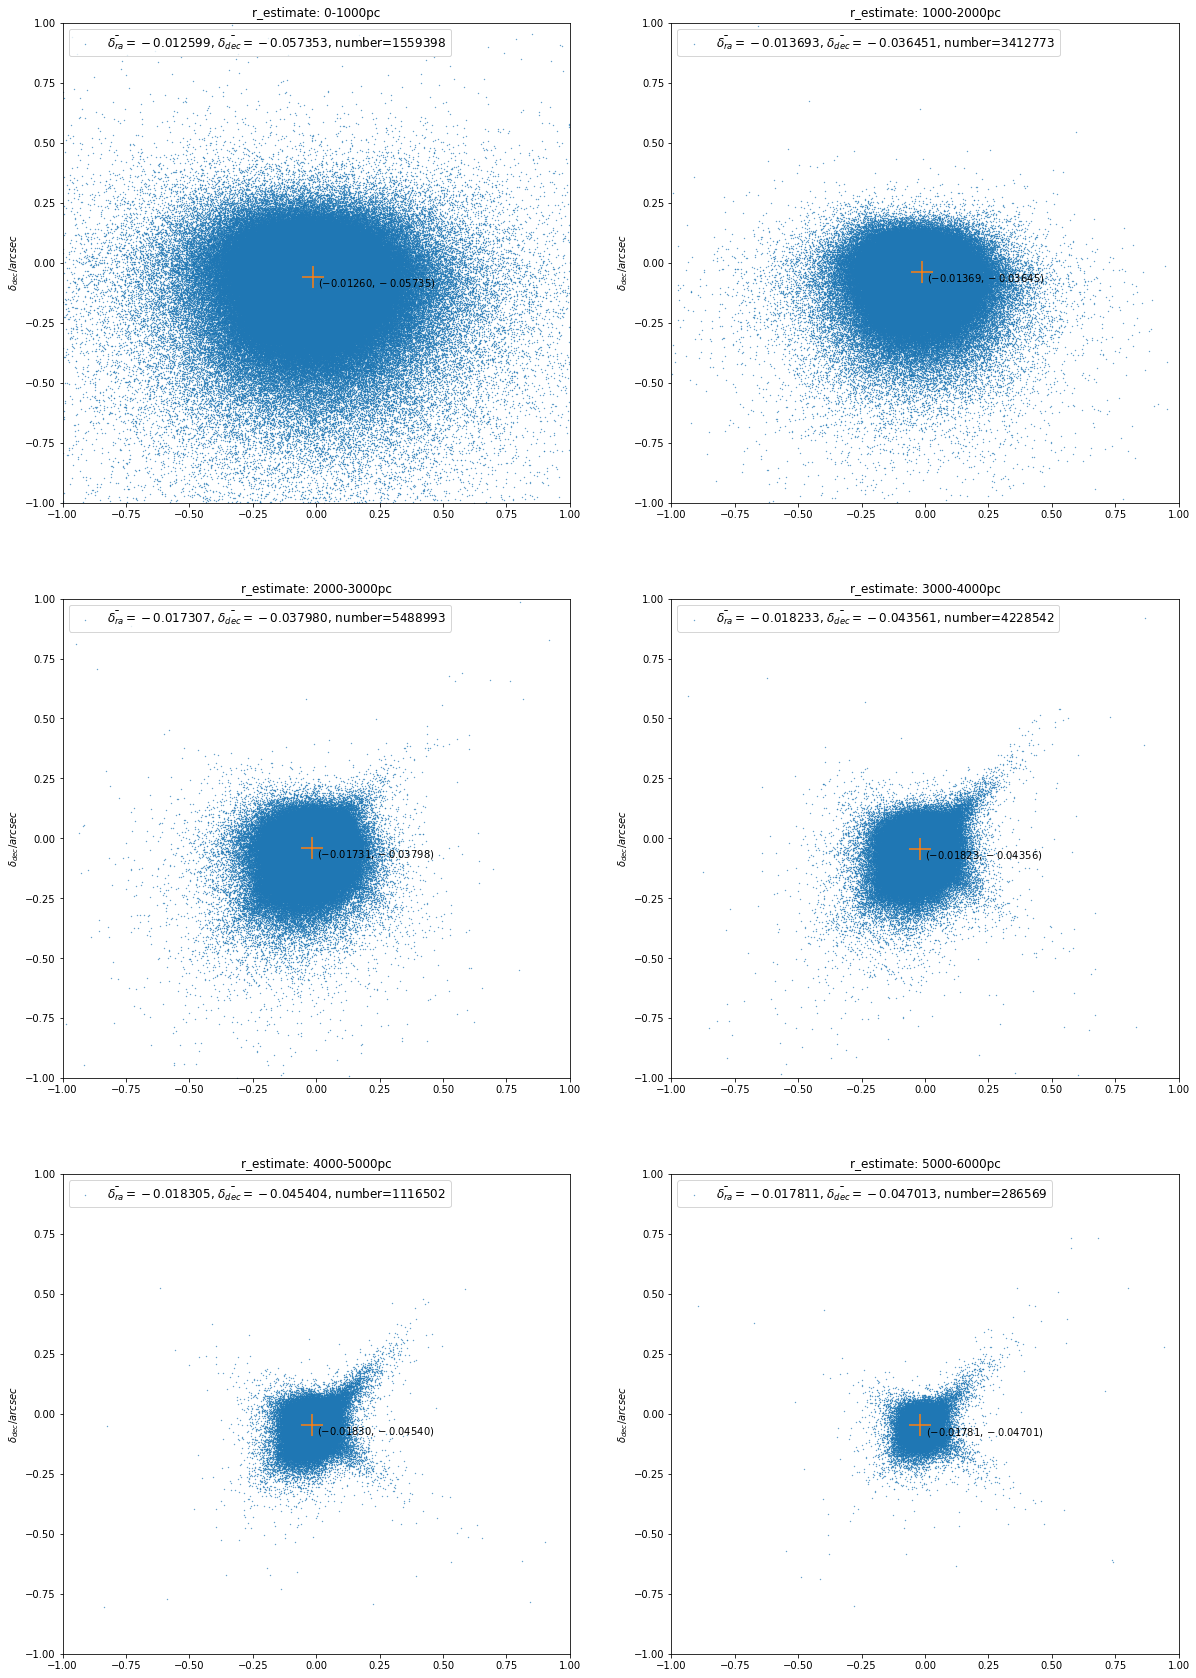

In [105]:
plt.figure(figsize=(20,30))
for i in range(6):
    mram=np.mean(mga[i].pmra)/100
    mdecm=np.mean(mga[i].pmdec)/100
    plt.subplot(321+i)
    plt.title(r'r_estimate: '+str(i*1000)+'-'+str((i+1)*1000)+'pc')
    plt.scatter(mga[i].pmra/100,mga[i].pmdec/100,alpha=1,s=0.1,label=r'$\bar{\delta_{ra}}=%f$, $\bar{\delta_{dec}}=%f$, number=%.0f'%(mram,mdecm,len(mga[i])))
    plt.scatter(mram,mdecm,s=500,marker='+')
    plt.text(mram+0.02,mdecm-0.04,'$(%0.5f,%0.5f)$'%(mram,mdecm))
    plt.ylabel(r'$\delta_{dec}/arcsec$')
    plt.legend(loc=2,fontsize=12)
    plt.axis([-1,1,-1,1])
#plt.savefig('delta_dist_mag.png')

In [109]:
g.sort_values('r_est')

,source_id,ra,dec,pmra,pmdec,phot_g_mean_mag,parallax,r_est,r_lo,r_hi,result_flag,modality_flag
168501,2657150241442202112,348.740581,0.315860,2.598580,-22.477287,19.185207,30.656423,32.779564,31.022925,34.743402,1,1
279583,2536129912855899904,15.798226,-0.738106,68.805884,-0.993960,18.887072,27.901115,35.821642,35.243691,36.418515,1,1
150387,2644192462549742336,353.101955,-0.840372,98.232166,0.131517,17.720015,24.708327,40.432978,40.016004,40.858575,1,1
269866,2545687486399981952,1.352464,-0.828872,9.866951,-25.255036,20.173985,22.163375,45.930018,41.513229,51.383780,1,1
229559,2545023106498673408,3.045327,-0.464130,10.231846,-13.371773,20.403738,21.591691,46.976065,42.871433,51.936763,1,1
128824,2642356484291058304,358.749323,0.234449,-8.512330,-12.026472,20.313770,21.453175,46.991801,43.789877,50.690380,1,1
26932,2678452729475026304,335.772824,0.502853,-72.112516,-25.038458,18.213865,21.008597,47.551362,46.896988,48.223921,1,1
140788,2643353084205753728,356.413032,0.920227,93.136208,-58.812653,18.397303,19.723205,50.647707,49.909520,51.407657,1,1
146939,2644187514747467392,353.279283,-0.913966,43.706915,-94.604780,18.636847,19.578723,51.088646,49.571173,52.700207,1,1
19538,2678271443200011136,335.746460,-0.185310,20.130037,-18.992461,18.749610,19.228007,52.199049,49.539623,55.154887,1,1


In [110]:
ga.sort_values('r_est')

,source_id,ra,dec,pmra,pmdec,phot_g_mean_mag,parallax,r_est,r_lo,r_hi,result_flag,modality_flag
4206784,4262513049985112192,286.055830,-0.764055,-52.265180,-53.836086,20.749386,543.950190,1.838458,1.826590,1.850479,1,1
5027785,4265349480709975168,283.904907,-0.980610,-18.291068,-16.372906,20.539545,145.163729,6.892582,6.760179,7.030179,1,1
4359228,4265374700774940160,284.429125,-0.634676,-28.528358,-8.728442,19.990017,135.003603,7.407960,7.315131,7.503134,1,1
1569307,4262365406178021504,287.418987,-0.833689,-26.747315,-16.841298,19.589254,133.054165,7.518634,7.389081,7.652727,1,1
4427663,4265334980893113984,284.137583,-1.030894,-20.393954,-20.566006,20.409000,128.108520,7.812434,7.634442,7.998770,1,1
6354954,4274753328782154624,274.916850,0.377911,-18.560641,-4.776698,20.663155,126.379058,7.917949,7.752579,8.090396,1,1
3264604,4265249528294294912,283.421938,-1.149917,-25.441817,-5.612375,20.478687,124.391744,8.047880,7.844075,8.262360,1,1
9549445,4272809014260132736,276.839289,-0.974079,-17.224472,-5.502076,20.236876,118.776034,8.418946,8.332113,8.507574,1,1
4042911,4265416413524610176,283.821772,-0.574759,-25.419336,-8.603990,20.143220,110.418555,9.066166,8.835454,9.309024,1,1
2758707,4265673355616880768,286.273483,0.078807,-26.771832,-17.365304,19.899792,109.149947,9.163087,9.031556,9.298435,1,1
